In [13]:
%load_ext autoreload
%autoreload 2
from skimage.io import imread, imsave
from skimage.filters import gaussian, sobel
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
import cv2
import os
import ipywidgets as widgets
from image_utils import *
INVESTIGATION_PATH = 'padding_investigation'
os.makedirs(INVESTIGATION_PATH, exist_ok=True)

get_path = lambda file: os.path.join(INVESTIGATION_PATH, file)


image = data.chelsea()

In [6]:
# synthetic_image = np.zeros_like(image)
# h, w, _ = image.shape
# synthetic_image[:h//2, :w//2, 0] = 255
# synthetic_image[h//2:, :w//2, 1] = 255
# synthetic_image[:h//2:, w//2:, :] = [255, 0, 255]
# synthetic_image[h//2:, w//2:, 2] = 255
# plt.imshow(synthetic_image)



# image = synthetic_image

In [14]:
import matplotlib as mpl
mpl.rcParams['text.color'] = 'white'
mpl.rcParams['figure.facecolor'] = 'black'


In [15]:

modes = ['constant', 'edge', 'wrap', 'reflect', 'symmetric']
@widgets.interact_manual(mode=modes, pad_width=10, 
                         save_separate=False, 
                         sigma=widgets.FloatSlider(20, min=0, max=50, step=0.1),)
def investigate_padding(mode: str='constant', 
                        pad_width: int=10, 
                        sigma=20,
                        save_separate: bool=False):
    
    fig, axes = plt.subplots(ncols=3, figsize=(20, 10))
    axes[0].imshow(image)
    axes[0].set_title('Original')
    # axes[1, 0].hist(image.flatten(), bins=200)
    padded_image = np.pad(image, pad_width=((pad_width, pad_width), 
                                            (pad_width, pad_width), 
                                            (0, 0)), mode=mode)
    axes[1].imshow(padded_image)
    axes[1].set_title('Padded image')
    # axes[1, 0].hist(padded_image.flatten(), bins=200)
    expectation = gaussian(padded_image, sigma)
    axes[2].imshow(expectation)
    axes[2].set_title(f'Applying gaussian filter on padded image\n with mode {mode.capitalize()}')
    # axes[1, 2].hist(expectation.flatten(), bins=200)
    

    for ax in axes:
        ax.set_yticks([])
        ax.set_xticks([])
        
    plt.savefig(get_path(f"{mode.capitalize()} padding.png"), transparent=True)
    plt.show()
    if save_separate:
        imsave(get_path("original.png"), image)
        imsave(get_path(f"{mode.capitalize()} padded_image.png"), padded_image)


interactive(children=(Dropdown(description='mode', options=('constant', 'edge', 'wrap', 'reflect', 'symmetric'…

In [17]:
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

In [262]:
from scipy.signal import convolve2d
shift_kernel = np.array([
    [0, 0, 0],
    [0, 0, 0],
    [0, 1, 0]
])

box_kernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])
gauss_kernel = 1/16 * np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
])



kernels = {
    "shift": shift_kernel,
    "box_filter" : box_kernel,
    "Gauss filter": gauss_kernel
}


kernels_values = list(kernels.keys())

def convolve_all_colours(im, window):
    """
    Convolves im with window, over all three colour channels
    """
    ims = []
    for d in range(3):
        im_conv_d = convolve2d(im[:,:,d], window, mode="same", boundary="symm")
        ims.append(im_conv_d)

    im_conv = np.stack(ims, axis=2).astype("uint8")

    return im_conv
mpl.rcParams['figure.facecolor'] = 'white'


bounds = [50, 150, 150, 250]

@widgets.interact_manual(kernel_name=kernels_values, save=False)
def convolve_playground(kernel_name: str='shift', save: bool=False):
    kernel = kernels[kernel_name]

    convolved_image = convolve_all_colours(image, kernel)
    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
    for ax in axes:
        ax.axis('off')
    axes[0].imshow(image)
    axes[0].set_title('Image before convolution')

    axes[1].imshow(convolved_image)
    axes[1].set_title("Image after convolution")
    plt.show()


    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
    for ax in axes:
        ax.axis('off')
        
    axes[0].imshow(cut_add_patch(image, bounds))
    axes[0].set_title('Image before convolution')

    axes[1].imshow(cut_add_patch(convolved_image, bounds))
    axes[1].set_title("Image after convolution")
    
    if save:
        plt.savefig(get_path(f"{kernel_name}.png"), transparent=True)
    plt.show()

interactive(children=(Dropdown(description='kernel_name', options=('shift', 'box_filter', 'Gauss filter'), val…

c:\Users\Aleksey Ryabykin\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


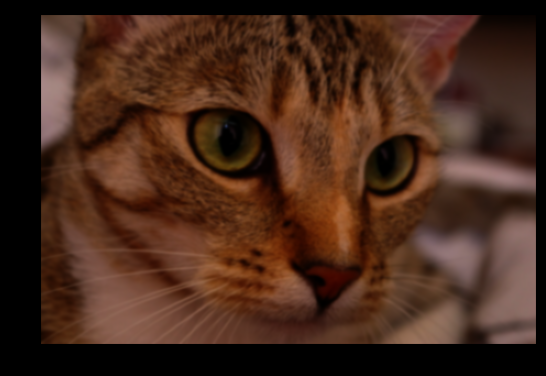

In [71]:
expectation = gaussian(image)


plt.imshow(expectation*expectation)

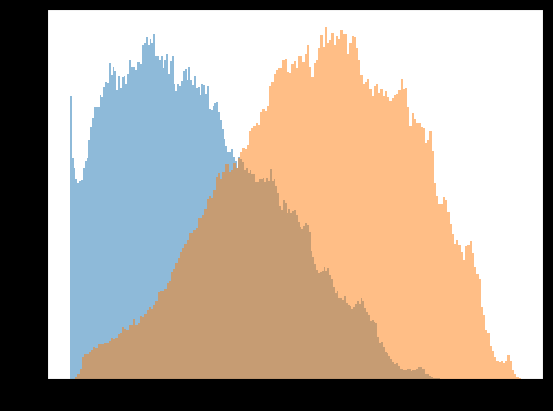

In [73]:
plt.hist((expectation*expectation).flatten(), alpha=0.5, bins=200)
plt.hist(expectation.flatten(), alpha=0.5, bins=200)
plt.show()